In [48]:
import numpy as np
import scipy as sc
import scipy.linalg
import scipy.interpolate
import matplotlib.pyplot as plt


In [49]:
x = np.array([0,10,15,20,22.5,30])
y = np.array([0,227.04,362.78,517.35,602.97,901.67])

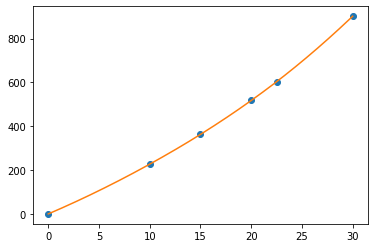

In [50]:
f=scipy.interpolate.interp1d(x,y,kind='quadratic')

x_new=np.arange(0,30,0.001)
plt.plot(x,y,'o',x_new,f(x_new))

In [100]:
def linspline(x,y):
    n=x.shape[0]
    A=np.zeros([(n-1)*2,(n-1)*2])

    j=0
    i=0
    while j<n and i+1<(n-1)*2:
        A[i][i]=x[j]
        A[i][i+1]=1
        A[i+1][i]=x[j+1]
        A[i+1][i+1]=1
        j=j+1
        i=i+2

    B=np.zeros((n-1)*2)
    B[0]=y[0]
    B[-1]=y[-1]

    i=1
    j=1
    while i<n-1:
        B[j]=y[i]
        B[j+1]=y[i]
        i=i+1
        j=j+2

    return A,B


In [101]:
A,B=linspline(x,y)

In [102]:
Matvals=np.linalg.solve(A,B)

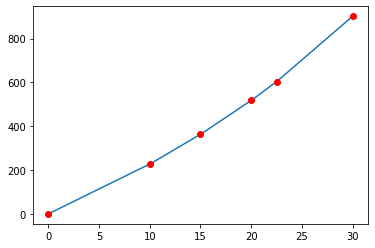

In [117]:
x_points=np.arange(0,30,0.001)

y_points=np.zeros(x_points.shape[0])

j=0
k=0
for i in range(0,x_points.shape[0]):
    if x_points[i]>=x[j+1]:
        j=j+1
        k=k+2

    


    y_points[i]=Matvals[k]*x_points[i]+Matvals[k+1]
    

    
plt.plot(x_points,y_points)
plt.plot(x,y,'ro')


